<a href="https://colab.research.google.com/github/dharmikdoshi/banking-churn-analysis/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Run
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
 
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set(palette="Set2")
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from mlxtend.plotting import plot_confusion_matrix
 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
 
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
 
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#Run
 
#Accessing the data that has been stored. 
from google.colab import drive
import pickle
drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/Project/Churn_Modelling.csv"

Mounted at /content/drive


In [ ]:
#Run
 
dataset=pd.read_csv(DATA_PATH)

In [ ]:
print(dataset.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [ ]:
print(dataset.head())

   RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]


In [ ]:
print(dataset.describe())

         RowNumber    CustomerId  ...  EstimatedSalary        Exited
count  10000.00000  1.000000e+04  ...     10000.000000  10000.000000
mean    5000.50000  1.569094e+07  ...    100090.239881      0.203700
std     2886.89568  7.193619e+04  ...     57510.492818      0.402769
min        1.00000  1.556570e+07  ...        11.580000      0.000000
25%     2500.75000  1.562853e+07  ...     51002.110000      0.000000
50%     5000.50000  1.569074e+07  ...    100193.915000      0.000000
75%     7500.25000  1.575323e+07  ...    149388.247500      0.000000
max    10000.00000  1.581569e+07  ...    199992.480000      1.000000

[8 rows x 11 columns]


In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True) #.....
#run

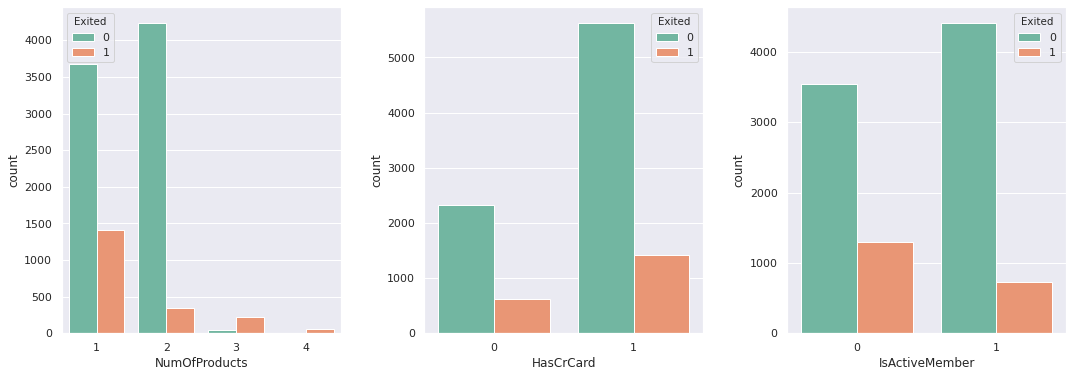

In [ ]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = dataset, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = dataset, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = dataset, ax = ax[2])




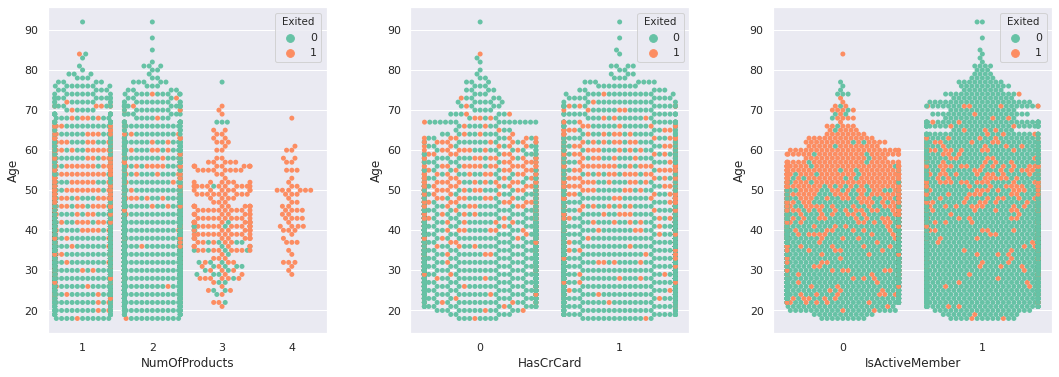

In [ ]:
_, ax = plt.subplots(1, 3, figsize=(18, 6 ))
plt.subplots_adjust(wspace=0.3)
sns.swarmplot(x = "NumOfProducts", y = "Age", hue="Exited", data = dataset, ax= ax[0])
sns.swarmplot(x = "HasCrCard", y = "Age", data = dataset, hue="Exited", ax = ax[1])
sns.swarmplot(x = "IsActiveMember", y = "Age", hue="Exited", data = dataset, ax = ax[2])

In [ ]:
encoder = LabelEncoder()
dataset["Geography"] = encoder.fit_transform(dataset["Geography"])
dataset["Gender"] = encoder.fit_transform(dataset["Gender"])
#run

In [ ]:
print(dataset.iloc[:20,[1,2]])

    Geography  Gender
0           0       0
1           2       0
2           0       0
3           0       0
4           2       0
5           2       1
6           0       1
7           1       0
8           0       1
9           0       1
10          0       1
11          2       1
12          0       0
13          0       0
14          2       0
15          1       1
16          1       1
17          2       0
18          2       1
19          0       0


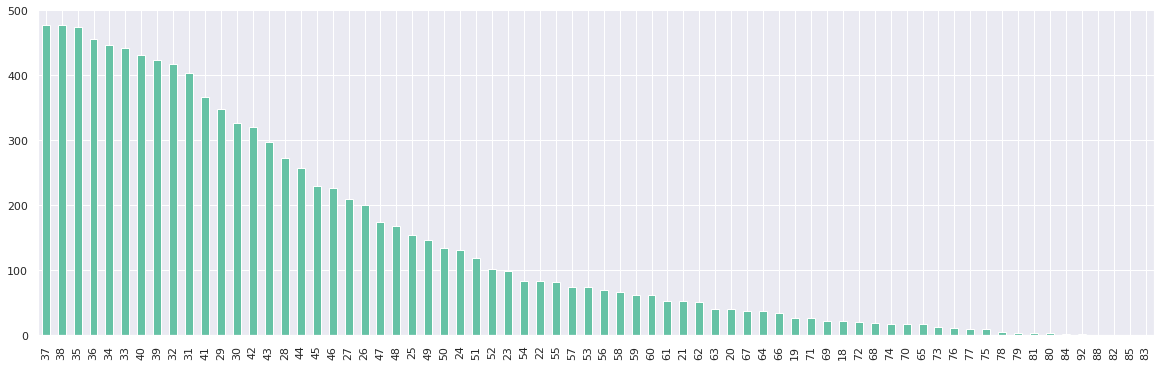

In [ ]:
dataset["Age"].value_counts().plot.bar(figsize=(20,6))

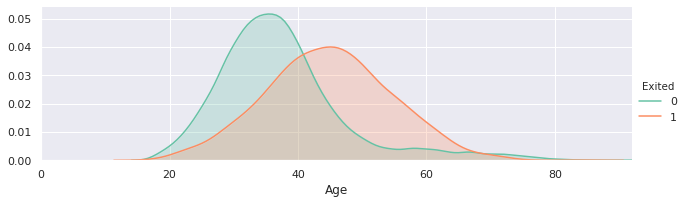

In [ ]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, dataset["Age"].max()))
facet.add_legend()

plt.show()

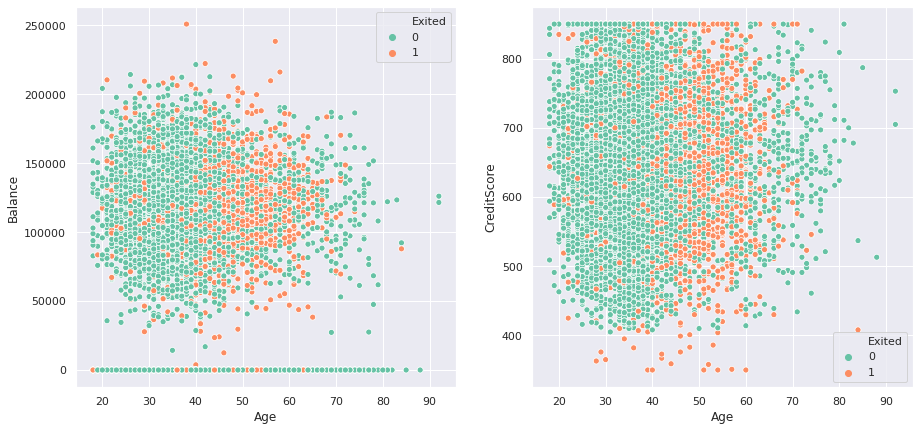

In [ ]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = dataset, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = dataset, ax=ax[1])

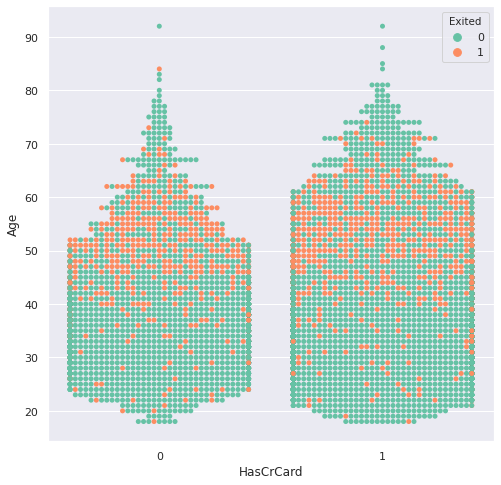

In [ ]:
plt.figure(figsize=(8, 8))
sns.swarmplot(x = "HasCrCard", y = "Age", data = dataset, hue="Exited")

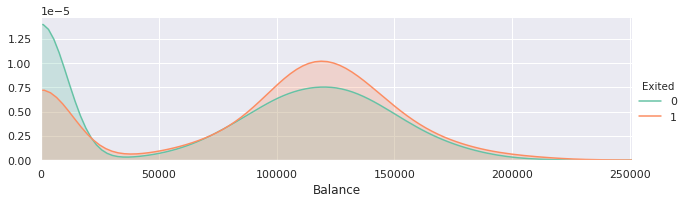

In [ ]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, dataset["Balance"].max()))
facet.add_legend()

plt.show()

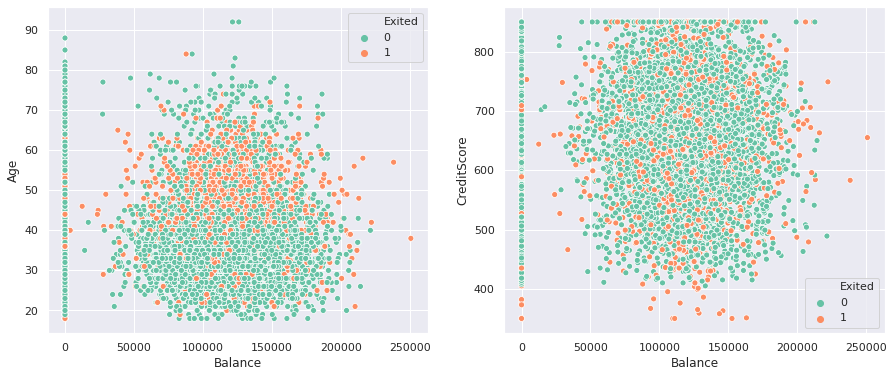

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "Balance", y = "Age", data = dataset, hue="Exited", ax = ax[0])
sns.scatterplot(x = "Balance", y = "CreditScore", data = dataset, hue="Exited", ax = ax[1])

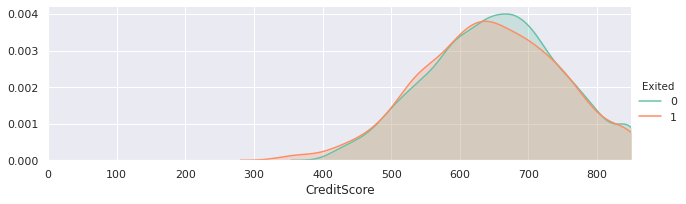

In [ ]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, dataset["CreditScore"].max()))
facet.add_legend()

plt.show()

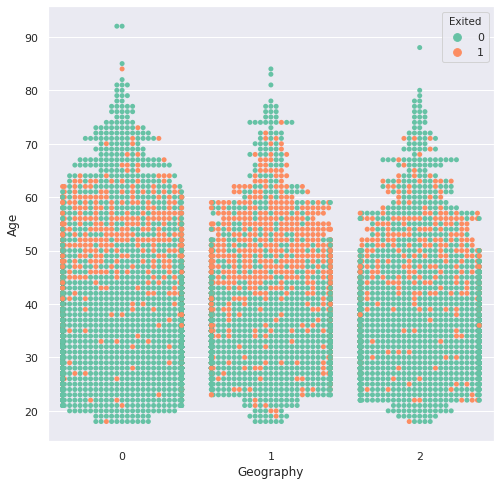

In [ ]:
plt.figure(figsize=(8, 8))
sns.swarmplot(x = "Geography", y = "Age", data = dataset, hue="Exited")

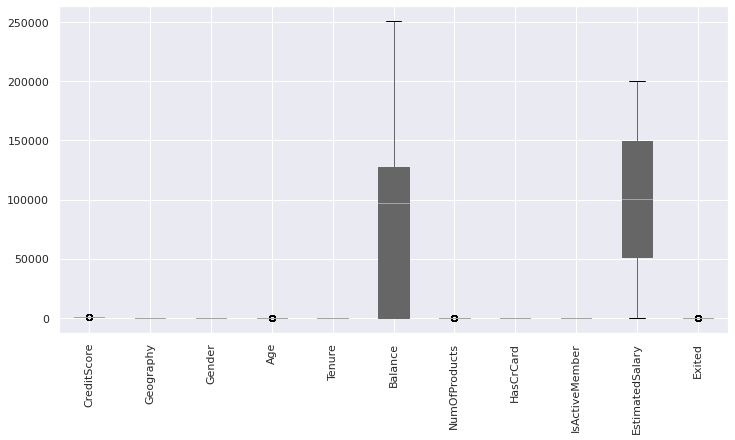

In [ ]:
plt.figure(figsize=(12,6))
bplot = dataset.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

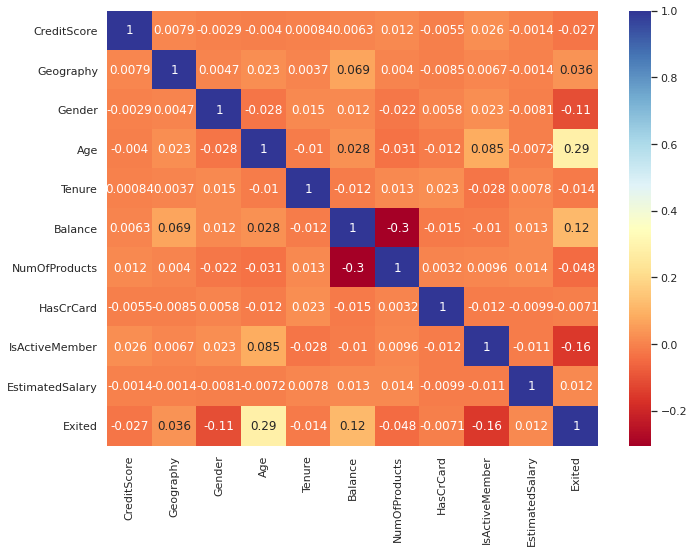

In [ ]:
plt.subplots(figsize=(11,8))
sns.heatmap(dataset.corr(), annot=True, cmap="RdYlBu")
plt.show()            

In [ ]:
X = dataset.drop("Exited", axis=1)   #.......
y = dataset["Exited"]
#run

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#run

In [ ]:
clf = GaussianNB()          #object creation
clf.fit(X_train, y_train)     #training
pred = clf.predict(X_test)    #prediction 
accuracy_score(pred, y_test)    #accuracy score based on the predicted values and the actual values. 

0.784

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.789

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.7895

In [ ]:
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)
#run

0.864

In [ ]:
clf  = XGBClassifier(max_depth = 10,random_state = 10, n_estimators=220, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.9)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)
#run

0.8575

In [ ]:
scaler = MinMaxScaler() 

bumpy_features = ["CreditScore", "Age", "Balance",'EstimatedSalary']

df_scaled = pd.DataFrame(data = X)
df_scaled[bumpy_features] = scaler.fit_transform(X[bumpy_features])
#run

In [ ]:
df_scaled.head()

NameError: ignored

In [ ]:
X = df_scaled
sm  = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.2, random_state=7)
#run

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(len(X_res))
print(len(y_test))


15926
3186


In [ ]:
clf = XGBClassifier(max_depth = 12,random_state=7, n_estimators=100, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.8)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))
#run

Accuracy: 0.9020715630885122
Precision: 0.9234293193717278
Recall: 0.8785803237858032
F1: 0.9004467134652201
Area under precision (AUC) Recall: 0.8725121034765964


In [ ]:
confusion_matrix(y_test, y_pred)
#run

array([[1463,  117],
       [ 195, 1411]])

In [ ]:
#Run
 
cs=[float(x) for x in input("Enter credit score:").split()]
geo=[int(x) for x in input("Enter geography.\n0=France.\n1=Germany.\n2=Spain.\n").split()]
gen=[int(x) for x in input("Enter gender:\n1=Male.\n0=Female.\n ").split()]
age=[int(x) for x in input("Enter age: ").split()]
ten=[int(x) for x in input("Enter Tenure: ").split()]
bal=[float(x) for x in input("Enter Balance: ").split()]
npro=[int(x) for x in input("Enter number of products: ").split()]
hcr=[int(x) for x in input("Has credit card?\n1=Yes.\n0=No.\n ").split()]
isac=[int(x) for x in input("Is active member?\n1=Yes.\n0=No.\n ").split()]
estsal=[float(x) for x in input("Enter estimated salary:  ").split()]
 
#arr=np.array([cs,geo,gen,cs,ten,bal,npro,hcr,isac,estsal])
 
 
d={'CreditScore':cs,'Geography':geo,'Gender':gen,'Age':age,'Tenure':ten,'Balance':bal,'NumOfProducts':npro,'HasCrCard':hcr,'IsActiveMember':isac,
   'EstimatedSalary':estsal}
finaldata=pd.DataFrame(d)
#run
#Principal component analysis

Enter credit score:300
Enter geography.
0=France.
1=Germany.
2=Spain.
1
Enter gender:
1=Male.
0=Female.
 1
Enter age: 24
Enter Tenure: 1
Enter Balance: 123456
Enter number of products: 1
Has credit card?
1=Yes.
0=No.
 1
Is active member?
1=Yes.
0=No.
 1
Enter estimated salary:  12345


In [ ]:
 #Run
 
scaler = MinMaxScaler() 
 
bumpy_features = ["CreditScore", "Age", "Balance",'EstimatedSalary']
 
df_scaled = pd.DataFrame(data = finaldata)
df_scaled[bumpy_features] = scaler.fit_transform(finaldata[bumpy_features])

In [ ]:
#Run
 
X = df_scaled
# print(X)
users5=open('/content/drive/My Drive/XGB.pickle','rb')
classifier=pickle.load(users5)
users5.close() 
 
y_pred = classifier.predict(X)
print(y_pred)
# abc=finaldata.iloc[:,:].values
# including all the missing values and calculating the kernel denstiy estimate

[0]
